In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
# Генерируем уникальный seed
my_code = "Johnson"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

np.random.seed(my_seed)

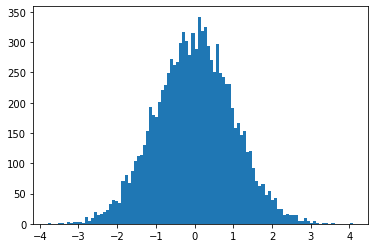

In [3]:
# Формируем случайную нормально распределенную выборку sample
N = 10000
sample = np.random.normal(0, 1, N)

plt.hist(sample, bins=100)
plt.show()

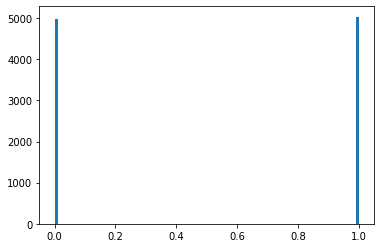

In [4]:
# Формируем массив целевых метока классов: 0 - если значение в sample меньше t и 1 - если больше
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])
plt.hist(target_labels, bins=100)
plt.show()

In [13]:
# Используя данные заготовки (или, при желании, не используя), 
# реализуйте функции для рассчета accuracy, precision, recall и F1

def confusion_matrix(target_labels, model_labels) :
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(target_labels)) :
        if target_labels[i] == 1 and model_labels[i] == 1 :
            tp += 1
        if target_labels[i] == 0 and model_labels[i] == 0 :
            tn += 1
        if target_labels[i] == 0 and model_labels[i] == 1 :
            fp += 1
        if target_labels[i] == 1 and model_labels[i] == 0 :
            fn += 1
    return tp, tn, fp, fn

def accuracy (target_labels, model_labels) :
    tp, tn, fp, fn = confusion_matrix(target_labels, model_labels)
    if (tp+fp+tn+fn)!=0:
        acc=(tp+tn)/(tp+fp+tn+fn)
    else: acc='_'
    return acc

def precision (target_labels, model_labels) :
    tp, tn, fp, fn = confusion_matrix(target_labels, model_labels)
    if (tp+fp)!=0:
        prec=tp/(tp+fp)
    else:
        prec='_'
    return prec

def recall (target_labels, model_labels) :
    tp, tn, fp, fn = confusion_matrix(target_labels, model_labels)
    if (tp+fn)!=0:
        rec=tp/(tp+fn)
    else: rec='_'
    return rec

def F1 (target_labels, model_labels) :
    tp, tn, fp, fn = confusion_matrix(target_labels, model_labels)
    if precision(target_labels, model_labels)!='_' and recall(target_labels, model_labels)!='_':
        fone=(precision(target_labels, model_labels)*recall(target_labels, model_labels))/(precision(target_labels, model_labels)+recall(target_labels, model_labels))
    else: fone='_'
    return fone

In [14]:
# Первый эксперимент: t = 0, модель с вероятностью 50% возвращает 0 и 1
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.random.randint(2, size=N)
print(accuracy(target_labels, model_labels))
print(precision(target_labels, model_labels))
print(recall(target_labels, model_labels))
print(F1(target_labels, model_labels))

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.

0.5007
0.5039556962025317
0.5062586926286509
0.25255228466646845


In [15]:
# Второй эксперимент: t = 0, модель с вероятностью 25% возвращает 0 и с 75% - 1
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])

labels = np.random.randint(4, size=N)
model_labels = np.array([0 if i == 0 else 1 for i in labels])
np.random.shuffle(model_labels)

print(accuracy(target_labels, model_labels))
print(precision(target_labels, model_labels))
print(recall(target_labels, model_labels))
print(F1(target_labels, model_labels))

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.

0.4996
0.5019387618665597
0.7458772104112855
0.3000319693094629


In [ ]:
# Проанализируйте, какие из метрик применимы в первом и втором экспериментах.

In [16]:
# Третий эксперимент: t = 2, модель с вероятностью 50% возвращает 0 и 1
t = 2
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.random.randint(2, size=N)
print(accuracy(target_labels, model_labels))
print(precision(target_labels, model_labels))
print(precision(target_labels, model_labels))
print(F1(target_labels, model_labels))

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.

0.4965
0.019411646988192914
0.019411646988192914
0.018550392044367946


In [18]:
# Четвёртый эксперимент: t = 2, модель с вероятностью 100% возвращает 0
t = 2
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.zeros(N)
print(accuracy(target_labels, model_labels))
print(precision(target_labels, model_labels))
print(recall(target_labels, model_labels))
print(F1(target_labels, model_labels))

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.

0.9768
_
0.0
_


In [20]:
# Проанализируйте, какие из метрик применимы в третьем и четвёртом экспериментах.
#accuracy и recall